# Import Statements

In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import numpy as ny
from matplotlib import pyplot
from matplotlib.pyplot import imshow
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from os import listdir
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Using TensorFlow backend.


# Constants

In [4]:
TRAIN_DIRECTORY = 'gtsrb-german-traffic-sign/Train'
TEST_DIRECTORY = 'gtsrb-german-traffic-sign/Test'
IMAGE_TARGET_SIZE_FOR_DATAGEN = (50, 50)
BATCH_SIZE_FOR_DATAGEN = 43
CLASS_MODE_FOR_DATAGEN = 'categorical'
VALIDATION_SPLIT = 0.1
SHAPE_INPUT_LAYER = (50, 50, 3)
NUM_CLASSIFICATIONS = 43

# Custom Functions

In [3]:
# Method returning the One Hot Value of a given One Hot Vector
def getOneHotValue(oneHotArray):
    for i in range(0, len(oneHotArray)):
        if oneHotArray[i] == 1:
            return i

# Load and Prepare Data

In [5]:
# Instantiate ImageDataGenerator.
# ImageDataGenerator is used to perform Image Augmentation.
# This class has a method-flow_from_directory which is used to read quickly huge number
# of images from directories within FileSystem and tag the corresponding classification
# to each image. Expectation of this method is the following:
      # Target directory should contain one subdirectory per class(class means the Output classifications)
      # Any PNG, JPG, BMP, PPM or TIF images
# The attribute-validation_split of ImageDataGeneratoris for splitting the entire dataset
# into separate Data sets-one for Training and the other for Validation.
# Value for attribute subset='training' denotes that the data generator that is returned from
# flow_from_directory contains the data set for Training the model.
# Value for attribute subset='validation' denotes that the data generator that is returned from
# flow_from_directory contains the data set for Validating the model.

# Create the ImageDataGenerator
#imageDataGen = ImageDataGenerator(validation_split = VALIDATION_SPLIT, horizontal_flip=True,
#                                 rotation_range=45, shear_range=45)
imageDataGen = ImageDataGenerator(validation_split = VALIDATION_SPLIT)

# Create the Data Generator for Train Set

train_generator = imageDataGen.flow_from_directory(
                    directory=TRAIN_DIRECTORY,
                    target_size=IMAGE_TARGET_SIZE_FOR_DATAGEN,
                    batch_size=BATCH_SIZE_FOR_DATAGEN,
                    class_mode=CLASS_MODE_FOR_DATAGEN,
                    subset='training')

print("Type of Train set Generator is :::: ", type(train_generator))

first_x_train, first_y_train = train_generator.next()

print("Type of first_x_train is :: ", type(first_x_train))
print("Type of first_y_train is :: ", type(first_y_train))
print("Shape of first_x_train is :: ", first_x_train.shape)
print("Shape of first_y_train is :: ", first_y_train.shape)

print("Length of First element of First element of First element of first_x_train is :: ", len(first_x_train[0][0][0]))
print("Shape of First element of First element of First element of first_x_train is :: ", first_x_train[0][0][0].shape)
#print("First Element of first_x_train is :: ", first_x_train[0])

# Create the Data Generator for Test Set
# For generating the test set, use validation_split of ImageDataGenerator

validation_generator = imageDataGen.flow_from_directory(
                    directory=TRAIN_DIRECTORY,
                    target_size=IMAGE_TARGET_SIZE_FOR_DATAGEN,
                    batch_size=BATCH_SIZE_FOR_DATAGEN,
                    class_mode=CLASS_MODE_FOR_DATAGEN,
                    subset='validation')
print("Type of TestSet Generator is :::: ", type(validation_generator))

first_x_val, first_y_val = validation_generator.next()

print("Type of first_x_val is :: ", type(first_x_val))
print("Type of first_y_val is :: ", type(first_y_val))
print("Shape of first_x_val is :: ", first_x_val.shape)
print("Shape of first_y_val is :: ", first_y_val.shape)


Found 35289 images belonging to 43 classes.
Type of Train set Generator is ::::  <class 'keras.preprocessing.image.DirectoryIterator'>
Type of first_x_train is ::  <class 'numpy.ndarray'>
Type of first_y_train is ::  <class 'numpy.ndarray'>
Shape of first_x_train is ::  (43, 50, 50, 3)
Shape of first_y_train is ::  (43, 43)
Length of First element of First element of First element of first_x_train is ::  3
Shape of First element of First element of First element of first_x_train is ::  (3,)
Found 3920 images belonging to 43 classes.
Type of TestSet Generator is ::::  <class 'keras.preprocessing.image.DirectoryIterator'>
Type of first_x_val is ::  <class 'numpy.ndarray'>
Type of first_y_val is ::  <class 'numpy.ndarray'>
Shape of first_x_val is ::  (43, 50, 50, 3)
Shape of first_y_val is ::  (43, 43)


# Image Visualisation of Train set and Test set and verifying corresponding class of each set

--- X Train Image at Index=3 --- 

Y Trainat Index=3 is ---  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


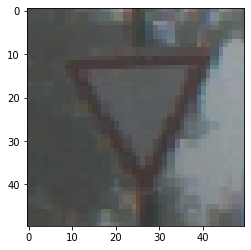

In [5]:
first_x_train_image = first_x_train[3].astype('int')
print("--- X Train Image at Index=3 --- \n")
pyplot.imshow(first_x_train_image)
print("Y Trainat Index=3 is --- ", first_y_train[3])

--- X Validation Image at Index=4 --- 

Y Validation at Index=4 is ---  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


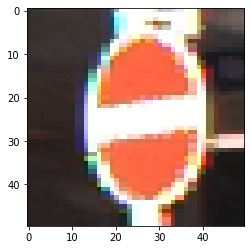

In [6]:
first_x_val_image = first_x_val[4].astype('int')
print("--- X Validation Image at Index=4 --- \n")
pyplot.imshow(first_x_val_image)
print("Y Validation at Index=4 is --- ", first_y_val[4])

# Load Test set: This is not the correct way to load the Test set, because
# ImageDataGenerator expects the images to be placed in separate
# directories corresponding to the output classes. Other wise
# ImageDataGenerator won't load any of the images.

In [7]:
#imageDataGenTest = ImageDataGenerator()
#test_generator = imageDataGenTest.flow_from_directory(
                    #TEST_DIRECTORY,
                    #target_size=(50, 50),
                    #classes=['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42'])

#print("Type of Test set Generator is :::: ", type(test_generator))

#first_x_test, first_y_test = test_generator.next()

#print("Type of first_x_test is :: ", type(first_x_test))
#print("Type of first_y_test is :: ", type(first_y_test))
#print("Shape of first_x_test is :: ", first_x_test.shape)
#print("Shape of first_y_test is :: ", first_y_test.shape)

# Class Indices
# Class Indices is stored inside a dictionary.

In [6]:
# Keys of the Class Indices dictionary will be the names of the classification folders given by us, in the
# ascending order. This means that if the folder names are 0, 1, 2, 3, ...., 10, 11, 12, 13, 14, 15, 16,
# 17, 18, 19, 20, 21, 22, ...., 42-after making in ascending order the names will be
# 0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, ...
# Values of the Class Indices dictionary will be the one hot value present in the y_train array
# corresponding to the appropriate x_train array.
# Example:
#     If the One Hot Value of an image is 1 at index=3(index starts from zero), then
#     we need to get the dictionary-key for the dictionary-value=3. If this is 11, we need to check
#     the image present in the subfolder named 11. This image will be the same image that we plotted
#     using PyPlot. This means that the Machine understood the class of the image we gave as 11.
#     After verifying the image in the subfolder, the image was found to be correct. So Machine understood
#     the correct class of the image as 11.
trian_class_indices = train_generator.class_indices
print("Indices Dictionary for Train set is :: ", trian_class_indices)
test_class_indices = validation_generator.class_indices
print("Indices Dictionary for Validation set is :: ", test_class_indices)

Indices Dictionary for Train set is ::  {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}
Indices Dictionary for Validation set is ::  {'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '38': 32, '39': 33, '4': 34, '40': 35, '41': 36, '42': 37, '5': 38, '6': 39, '7': 40, '8': 41, '9': 42}


# Display the Image class understood by the Machine

In [9]:
# Get the One Hot Value of Train Set Target
y_train_onehotVal = getOneHotValue(first_y_train[3])
print("y_train_onehotVal is :: ", y_train_onehotVal)
# Finding the Class corresponding to the given Train set Image
key_list = list(trian_class_indices.keys()) 
val_list = list(trian_class_indices.values())
print("Category of the X Train Image at Index=3 is :: ", key_list[val_list.index(y_train_onehotVal)])

y_train_onehotVal is ::  5
Category of the X Train Image at Index=3 is ::  13


# Design the Model

In [10]:
# Model Chosen is Convolutional Neural Network(CNN)
model = Sequential()

# First layer of the model should be a Convolution layer-Add a Convolv 2D layer
model.add(Conv2D(18, (10, 10), padding="valid",strides=1,name="Convolv_1",
                 activation="relu", input_shape=SHAPE_INPUT_LAYER))
model.add(Conv2D(36,(10,10),padding="same",strides=1,name="Convolv_2",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(40, (5, 5), padding="same", name="Convolv_3",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(50, (3, 3), padding="same", name="Convolv_4",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
# For adding fully connected layer, we need to convert the 3d array to 1d for which we use Flatten() 
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(NUM_CLASSIFICATIONS, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolv_1 (Conv2D)           (None, 41, 41, 18)        5418      
_________________________________________________________________
Convolv_2 (Conv2D)           (None, 41, 41, 36)        64836     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 36)        0         
_________________________________________________________________
Convolv_3 (Conv2D)           (None, 20, 20, 40)        36040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 40)        0         
_________________________________________________________________
Convolv_4 (Conv2D)           (None, 10, 10, 50)        18050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 50)         

# Compile the Model

In [11]:
# Since this is a multi-classification problem loss function is chosen as categorical_crossentropy
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Train the Model

In [12]:
history = model.fit_generator(train_generator, steps_per_epoch=821, epochs=10, validation_data=validation_generator, verbose=1)
print("--- Train History is --- ", history)

Epoch 1/10
821/821 [==============================] - 604s 735ms/step - loss: 1.4080 - accuracy: 0.6484 - val_loss: 0.5989 - val_accuracy: 0.7763
Epoch 2/10
821/821 [==============================] - 521s 635ms/step - loss: 0.2691 - accuracy: 0.9350 - val_loss: 0.0144 - val_accuracy: 0.8339
Epoch 3/10
821/821 [==============================] - 526s 641ms/step - loss: 0.1642 - accuracy: 0.9637 - val_loss: 1.2233 - val_accuracy: 0.8969
Epoch 4/10
821/821 [==============================] - 522s 636ms/step - loss: 0.1155 - accuracy: 0.9742 - val_loss: 0.0012 - val_accuracy: 0.9000
Epoch 5/10
821/821 [==============================] - 521s 635ms/step - loss: 0.0881 - accuracy: 0.9817 - val_loss: 0.0998 - val_accuracy: 0.8824
Epoch 6/10
821/821 [==============================] - 525s 639ms/step - loss: 0.0774 - accuracy: 0.9847 - val_loss: 5.3163e-04 - val_accuracy: 0.9189
Epoch 7/10
821/821 [==============================] - 534s 650ms/step - loss: 0.0833 - accuracy: 0.9852 - val_loss: 0.20

# Save the Model

In [13]:
model.save('TrafficSignalBenchMark_Model1.h5')

# Load the saved Model

In [13]:
# Loading the Model
loadedModel = load_model('TrafficSignalBenchMark_Model1.h5')
loadedModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Convolv_1 (Conv2D)           (None, 41, 41, 18)        5418      
_________________________________________________________________
Convolv_2 (Conv2D)           (None, 41, 41, 36)        64836     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 36)        0         
_________________________________________________________________
Convolv_3 (Conv2D)           (None, 20, 20, 40)        36040     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 40)        0         
_________________________________________________________________
Convolv_4 (Conv2D)           (None, 10, 10, 50)        18050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 50)         

# Displaying the Weights and Biases from the loaded model. 

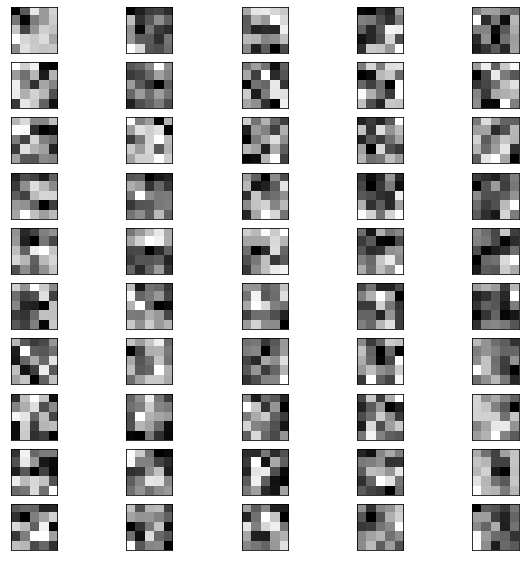

In [17]:
# retrieve weights from the fourth hidden layer
filters, biases = loadedModel.layers[3].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 10, 1
pyplot.figure(figsize=(10,10))
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(5):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 5, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

# Evaluate the Model

In [14]:
loss_info_evaluation = loadedModel.evaluate_generator(validation_generator, verbose=1)
print("loss_info_evaluation >>> ", loss_info_evaluation)

92/92 [==============================] - 17s 179ms/step
loss_info_evaluation >>>  [2.7848727703094482, 0.8971938490867615]


# Function for getting Test images as array

In [15]:
def getTestImageList(test_directory):
    images_list = []
    file_names = []
    i = 0;
    for filename in listdir(test_directory):
        if i == 100:
            break
        # load image
        img = load_img(test_directory + '/' + filename, target_size=IMAGE_TARGET_SIZE_FOR_DATAGEN)
        img_array = img_to_array(img)
        file_names.append(filename)
        # store loaded image
        images_list.append(img_array)
        i +=1
    return images_list, file_names
test_images, test_file_names = getTestImageList(TEST_DIRECTORY)
test_images = ny.asarray(test_images)

# Plotting first four Images in Test set

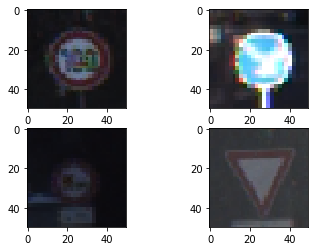

In [16]:
fig, ((ax1, ax2), (ax3, ax4)) = pyplot.subplots(2, 2)
ax1.imshow(test_images[0].astype('int'))
ax2.imshow(test_images[1].astype('int'))
ax3.imshow(test_images[2].astype('int'))
ax4.imshow(test_images[3].astype('int'))

In [17]:
predictions = loadedModel.predict_classes(test_images[0:4, :, :, :])
print("Predictions :::: ", predictions)

Predictions ::::  [40  1  2  5]


In [51]:
i = 0;
for fileName in test_file_names:
    if i == 4:
        break
    print("Image-" + str(i) + " is :::: ", fileName)
    i+=1

Image-0 is ::::  03937.png
Image-1 is ::::  02754.png
Image-2 is ::::  12397.png
Image-3 is ::::  09800.png


# Display the Predicted classes

In [20]:
# Finding the Class corresponding to the given Train set Image
key_list = list(trian_class_indices.keys()) 
val_list = list(trian_class_indices.values())
for i in predictions:
    predicted_value = int(i)
    print("Predicted Class is :::: ", key_list[val_list.index(predicted_value)])


Predicted Class is ::::  7
Predicted Class is ::::  1
Predicted Class is ::::  10
Predicted Class is ::::  13
